In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Import dataset
data = pd.read_csv("Salary_Data.csv")

<font size="4">Explore Data</font>

In [3]:
data.shape
#2 columns, 30 rows

(30, 2)

In [4]:
#Check for missing values
data.isnull().any()
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
#Set X and y variables
X = data['YearsExperience']
y = data['Salary']

In [8]:
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [9]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Salary')

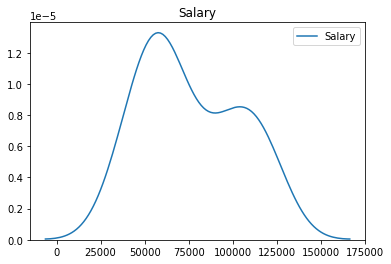

In [10]:
#Plot distribution of target
sns.kdeplot(data.Salary).set_title('Salary')

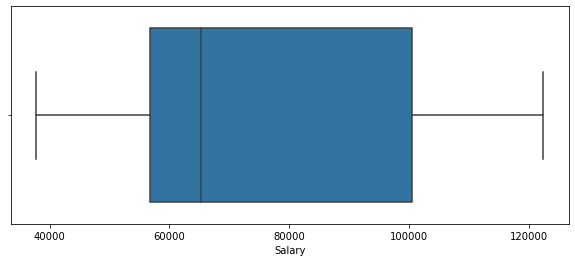

In [11]:
plt.figure(figsize = (10,4))
sns.boxplot(data.Salary)

In [12]:
data.Salary.median()

65237.0

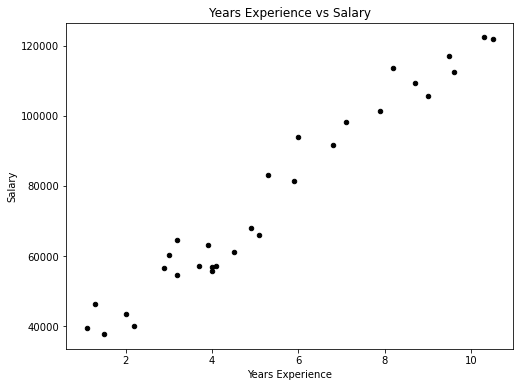

In [13]:
#Scatter plot to see relationship between Salary and YearsExperience
plt.rcParams['axes.facecolor'] = 'w'
data.plot(kind='scatter',x='YearsExperience',y='Salary',color='black',figsize=(8,6))
plt.title("Years Experience vs Salary")
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.show()

<font size="2">Since the relationship between Years Experience and Salary are linear, Linear Regression would be good to use for prediction.</font>

In [14]:
#Create training/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [15]:
#Import Linear Regression and fit to training set
from sklearn.linear_model import LinearRegression

In [16]:
d_train = LinearRegression()
d_train.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [17]:
#Predict salary on test set
y_pred = d_train.predict(X_test.values.reshape(-1,1))

In [18]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [19]:
#Convert to array
y_test = y_test.values


In [20]:
#Combine training and testing values into 2 arrays
y_final = y_test, np.round(y_pred,2)
y_final

(array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
         55794.,  83088.]),
 array([ 40817.78, 123188.08,  65154.46,  63282.41, 115699.87, 108211.66,
        116635.9 ,  64218.44,  76386.78]))

In [21]:
#Add results to dataframe for comparison
result = pd.DataFrame(list(y_final))


In [22]:
result
result = result.transpose()

In [23]:
result.columns = ['Actual','Predicted']

In [24]:
result

,Actual,Predicted
0,37731.0,40817.78
1,122391.0,123188.08
2,57081.0,65154.46
3,63218.0,63282.41
4,116969.0,115699.87
5,109431.0,108211.66
6,112635.0,116635.90
7,55794.0,64218.44
8,83088.0,76386.78


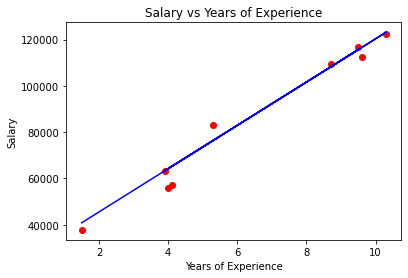

In [25]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, d_train.predict(X_test.values.reshape(-1,1)), color = 'blue')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [29]:
#Score accuracy of the prediction model
import sklearn.metrics as sm

print("R2 score =", sm.r2_score(y_test, y_pred) * 100)

R2 score = 97.4099340721351
